In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

In [2]:
podcasts_segments = np.load('podcast_segmented.npy')
ads_segments = np.load('adBinary_segmented.npy')

X_train, X_test, y_train, y_test = train_test_split(np.array(podcasts_segments),
                                                    np.array(ads_segments),
                                                    test_size=0.33,
                                                    random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test, 
                                                test_size=0.5,
                                                random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_train.shape)

(6486, 128, 20)
(1597, 128, 20)
(1598, 128, 20)
(6486, 128, 20, 1)


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 20, 1)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (2, 2), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 18, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 9, 32)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 18144)             0         
                                                                 
 dense (Dense)               (None, 64)                1161280   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,161,665
Trainable params: 1,161,665
Non-trainable params: 0
______________________________________________

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val))

Epoch 1/10
203/203 [==============================] - 5s 21ms/step - loss: 2.4931 - accuracy: 0.8377 - val_loss: 2.7624 - val_accuracy: 0.8209
Epoch 2/10
203/203 [==============================] - 4s 18ms/step - loss: 2.4566 - accuracy: 0.8407 - val_loss: 2.7624 - val_accuracy: 0.8209
Epoch 3/10
203/203 [==============================] - 4s 18ms/step - loss: 2.4566 - accuracy: 0.8407 - val_loss: 2.7624 - val_accuracy: 0.8209
Epoch 4/10
203/203 [==============================] - 4s 19ms/step - loss: 2.4566 - accuracy: 0.8407 - val_loss: 2.7624 - val_accuracy: 0.8209
Epoch 5/10
203/203 [==============================] - 4s 18ms/step - loss: 2.4566 - accuracy: 0.8407 - val_loss: 2.7624 - val_accuracy: 0.8209
Epoch 6/10
203/203 [==============================] - 4s 18ms/step - loss: 2.4566 - accuracy: 0.8407 - val_loss: 2.7624 - val_accuracy: 0.8209
Epoch 7/10
203/203 [==============================] - 4s 17ms/step - loss: 2.4566 - accuracy: 0.8407 - val_loss: 2.7624 - val_accuracy: 0.8209

50/50 - 0s - loss: 2.5676 - accuracy: 0.8335 - 245ms/epoch - 5ms/step


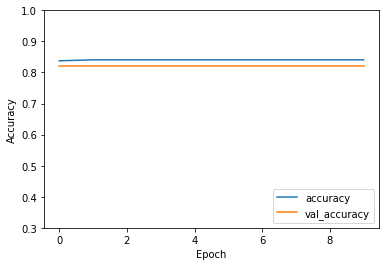

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)